# **Experimento com Médias Móveis**

---

### ***Instalando e importando Bibliotecas***

In [1]:
#!pip install ta
#!pip install yfinance
#!pip install mplfinance

In [2]:
import yfinance as yf
import ta
import pandas as pd
import mplfinance as mpf

### ***Extraindo dados do ativo financeiro***

In [3]:
ativo = 'WEGE3.SA'
dados = yf.download(ativo, start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


### ***Experimento***

Vamos plotar duas médias móveis exponenciais de 20 períodos, porém uma calculada sobre a máxima e a outra sobre a mínima.

In [4]:
periodo_ema_experimento = 20

dados['Ema_high'] = ta.trend.ema_indicator(dados['High'], window=periodo_ema_experimento)
dados['Ema_low'] = ta.trend.ema_indicator(dados['Low'], window=periodo_ema_experimento)

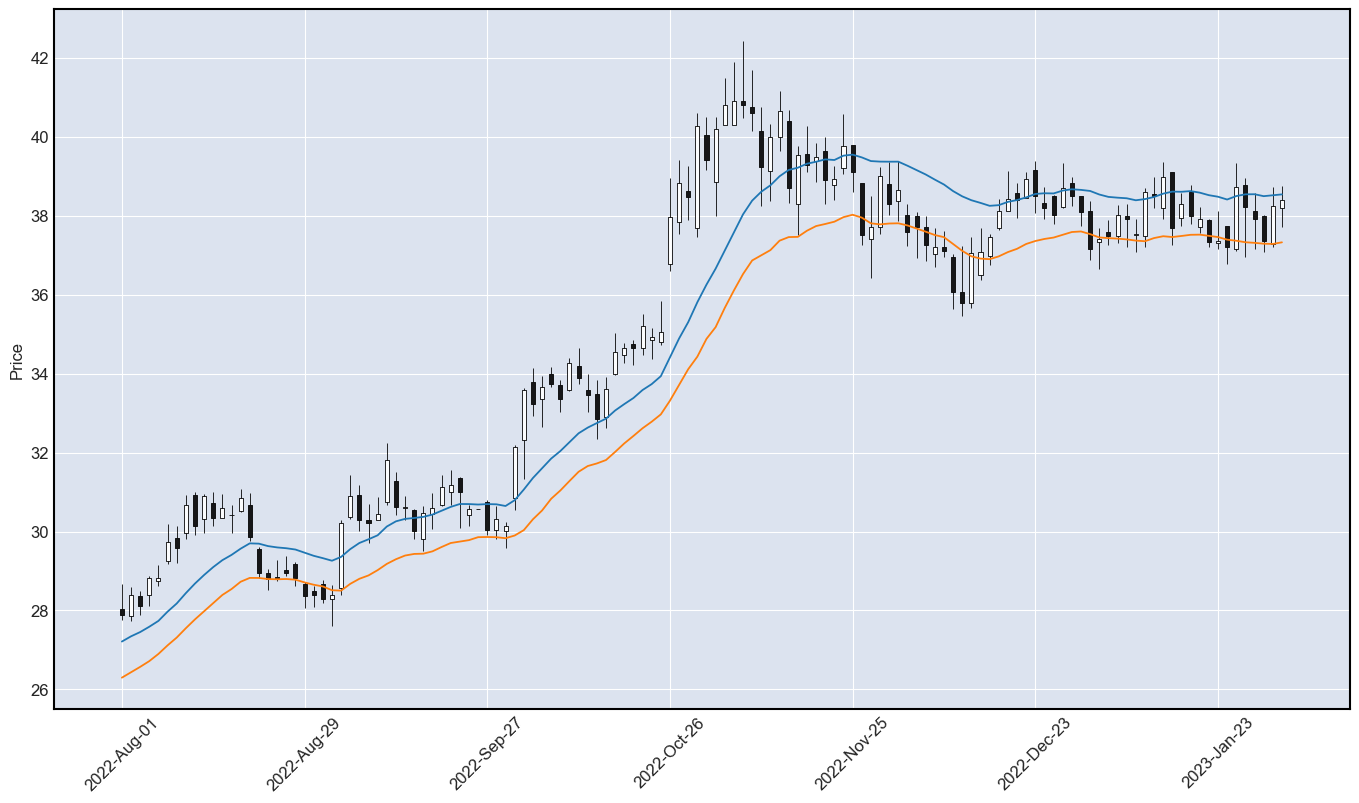

In [14]:
df_plot = dados.loc['2022-08-1':'2023-02-1']
plot_mm_high = mpf.make_addplot(df_plot['Ema_high'])
plot_mm_low = mpf.make_addplot(df_plot['Ema_low'])

mpf.plot(df_plot, type='candle', addplot=[plot_mm_high, plot_mm_low], figsize=(18,10))

### ***Criar indicador personalizado***

In [6]:
dados['indicator'] = dados['Ema_high'] - dados['Ema_low']

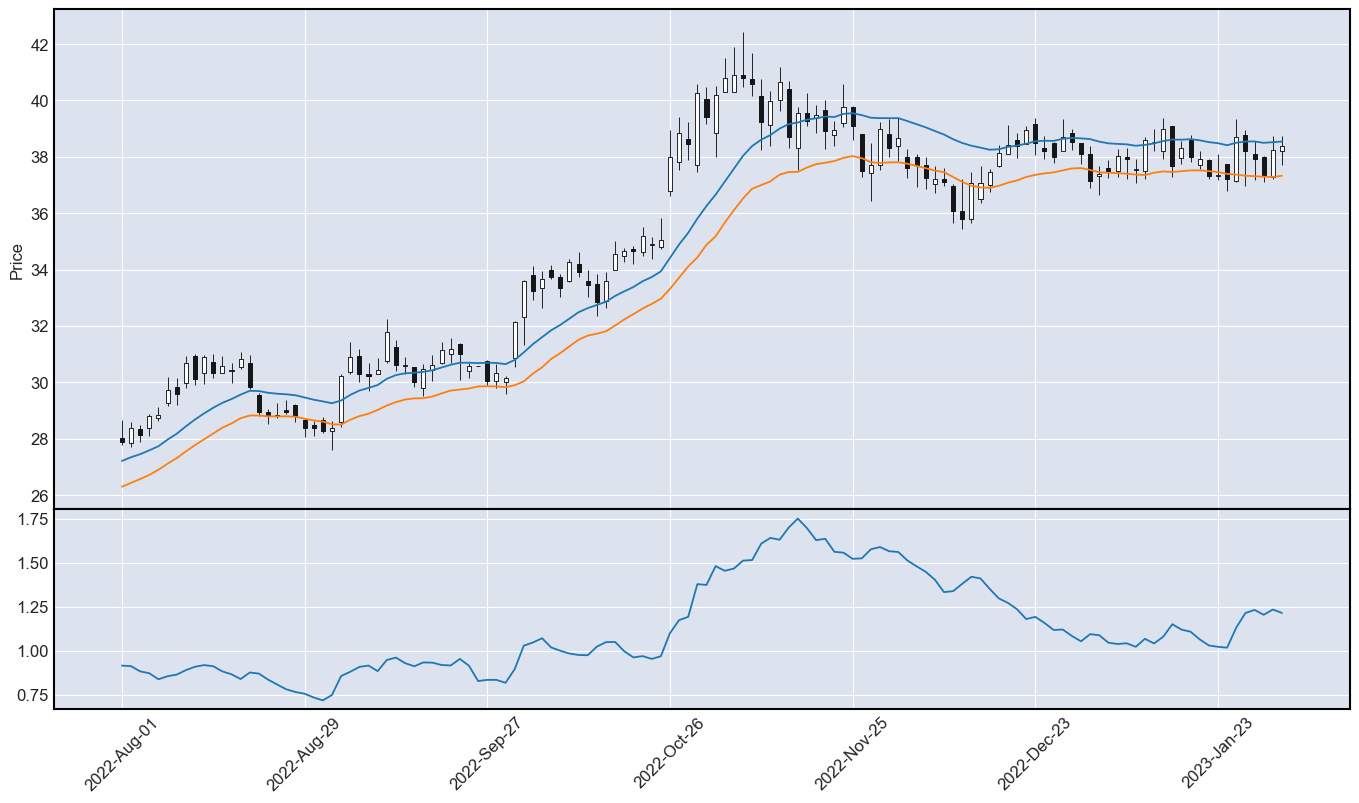

In [7]:
df_plot = dados.loc['2022-08-1':'2023-02-1']
plot_ind = mpf.make_addplot(df_plot['indicator'], panel=1)
# = mpf.make_addplot(df_plot['Dist_media_mm'], panel=1)
plot_mm_high = mpf.make_addplot(df_plot['Ema_high'])
plot_mm_low = mpf.make_addplot(df_plot['Ema_low'])

mpf.plot(df_plot, type='candle', addplot=[plot_ind, plot_mm_high, plot_mm_low], figsize=(18,10))

### ***Adicionando uma média ao indicador***

In [8]:
dados['mm_indicator'] = dados['indicator'].rolling(20).mean()

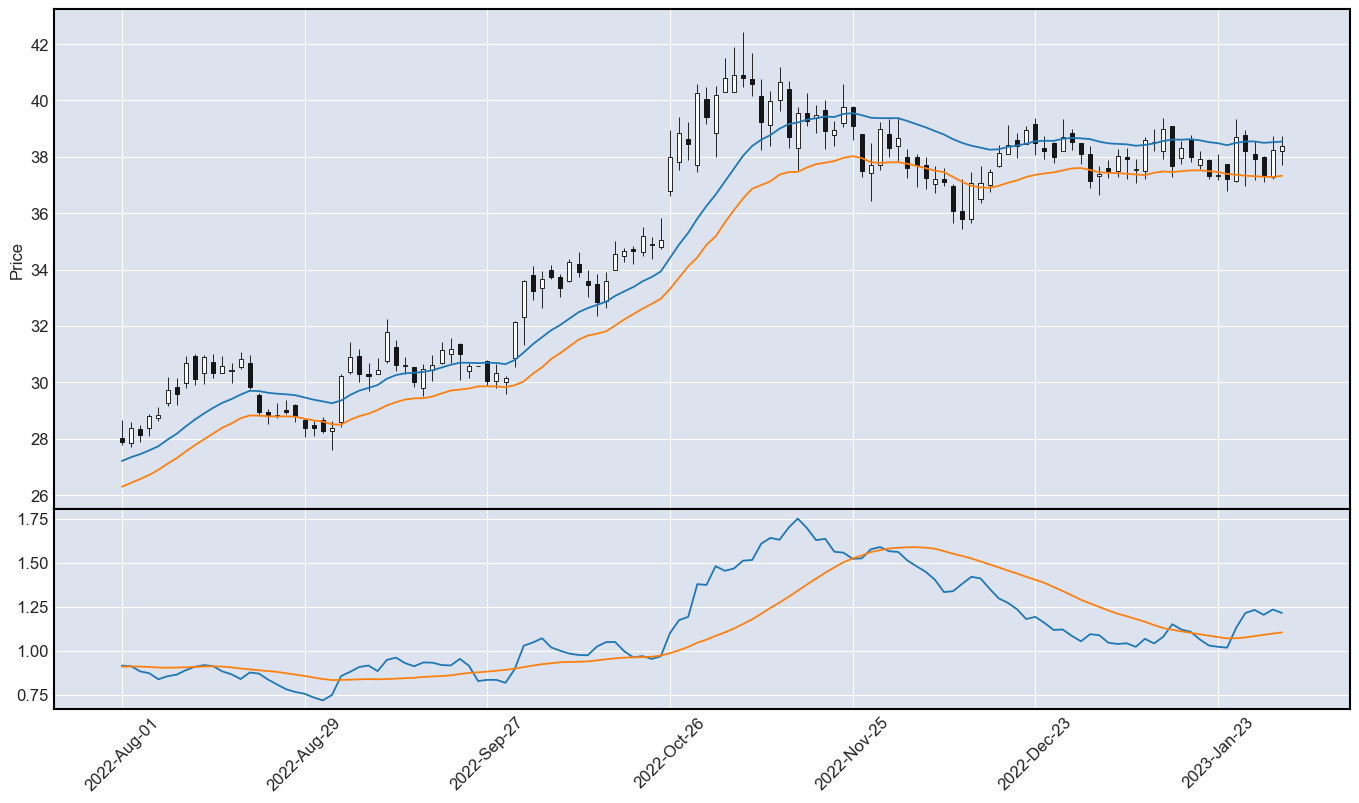

In [12]:
df_plot = dados.loc['2022-08-1':'2023-02-1']
plot_ind = mpf.make_addplot(df_plot['indicator'], panel=1)
plot_ind_mm = mpf.make_addplot(df_plot['mm_indicator'], panel=1)
plot_mm_high = mpf.make_addplot(df_plot['Ema_high'])
plot_mm_low = mpf.make_addplot(df_plot['Ema_low'])

mpf.plot(df_plot, type='candle', addplot=[plot_ind, plot_mm_high, plot_mm_low, plot_ind_mm], figsize=(18,10))